# 1. Loading Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.utils import resample
from sklearn.datasets import make_classification 
from sklearn import metrics

# 2. Loading the Dataset and Splitting into Training and Testing

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Original Data shape (45211, 16)
The shape of X_train is: (36168, 16)
The shape of X_test is: (9043, 16)
The shape of y_train is: (36168,)
The shape of y_test is: (9043,)
no     39922
yes     5289
Name: y, dtype: int64


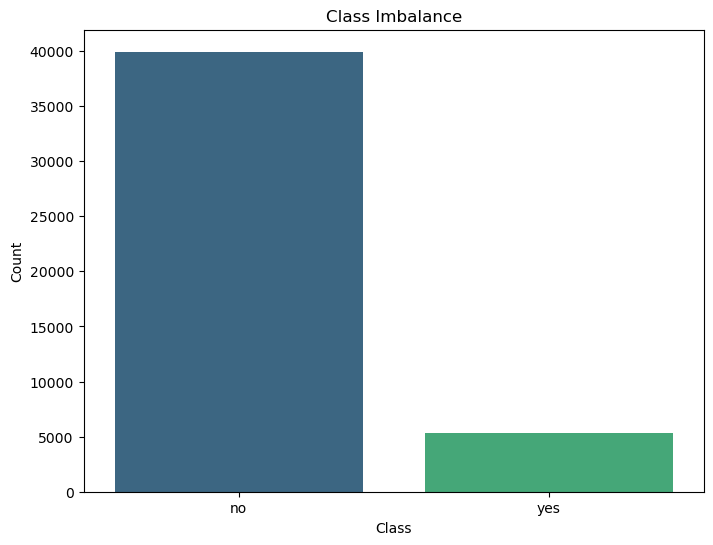

In [2]:
marketting = pd.read_csv('bank_term.csv')


X = marketting.drop(columns=['y'])  # Features
y = marketting['y']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#checking the shape of the different test and train parameters
print(marketting.shape)
print(marketting.columns)
print('Original Data shape', X.shape)
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

# checking if the dataset has a balance class
class_counts = marketting['y'].value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

# 3. Training Data Pre-processing

### 3.1 Categorical Feature Encoding

In [3]:
# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
X_train_encoded = pd.get_dummies(X_train)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

print(X_train_encoded.shape)
print(y_train_encoded.shape)

print(X_train)
print(X_train_encoded)

(36168, 51)
(36168,)
       age          job   marital  education default  balance housing loan  \
13932   57       admin.  divorced  secondary      no      658      no   no   
9894    37      unknown   married    unknown      no     1699      no   no   
39946   35   technician  divorced  secondary      no     2823     yes   no   
9217    35       admin.   married  secondary      no      214     yes  yes   
4124    38     services    single   tertiary      no      323     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
30403   35   management    single   tertiary      no      995      no   no   
21243   35   management   married   tertiary      no      750     yes   no   
42613   35   management   married   tertiary      no      323      no   no   
43567   70      retired   married  secondary      no      616      no   no   
2732    46  blue-collar    single  secondary      no       57     yes   no   

        contact  day month  duration  camp

### 3.2 Tackling Class Imbalance

0    31942
1     4226
dtype: int64


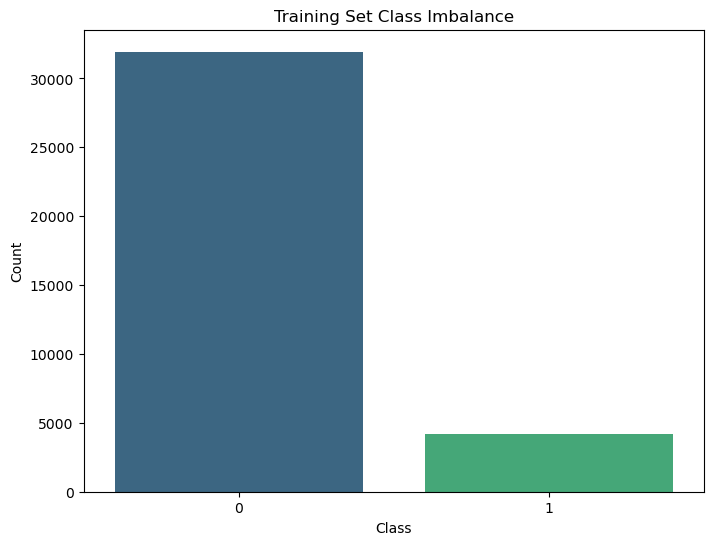

In [4]:
class_counts = pd.Series(y_train_encoded).value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Training Set Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [5]:
# Applying UNDER SAMPLING TECHNIQUE
from imblearn.under_sampling import RandomUnderSampler

# Making an instance of UnderSampling class  
under_sampler = RandomUnderSampler(random_state=42)
  
# Fit predictor (x variable) and target (y variable) using fit_resample() 
X_train, y_train = under_sampler.fit_resample(X_train_encoded, y_train_encoded) 
  
# Printing number of samples 
# in each class after Over-Sampling 
print('After Random Under Sampling: ') 
print('Samples in class No ', (y_train == 0).sum()) 
print('Samples in class Yes ', (y_train == 1).sum())

After Random Under Sampling: 
Samples in class No  4226
Samples in class Yes  4226


# 4 Testing Data Pre-processing

### 4.1 Categorical Feature Encoding

In [6]:

# Encoding the Categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
X_test_encoded = pd.get_dummies(X_test)

# Encode target variable
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

print(X_test_encoded.shape)
print(y_test_encoded.shape)


print(X_test)
print(X_test_encoded)

(9043, 51)
(9043,)
       age          job  marital  education default  balance housing loan  \
14001   37   management  married   tertiary      no     1403     yes   no   
32046   36     services   single  secondary      no     -253     yes   no   
13318   47  blue-collar  married    primary      no     -406      no  yes   
42991   57    housemaid  married    primary      no      501     yes  yes   
14237   33  blue-collar  married  secondary     yes     -406     yes  yes   
...    ...          ...      ...        ...     ...      ...     ...  ...   
18448   53  blue-collar  married    primary      no      252      no   no   
6654    28   management   single   tertiary      no     1996     yes  yes   
17106   28     services  married  secondary      no        7      no   no   
9025    59      retired  married  secondary      no        0      no   no   
13171   50   technician  married    primary      no     -315      no  yes   

         contact  day month  duration  campaign  pdays  

### 4.2 Tackling class Imbalance

0    7980
1    1063
dtype: int64


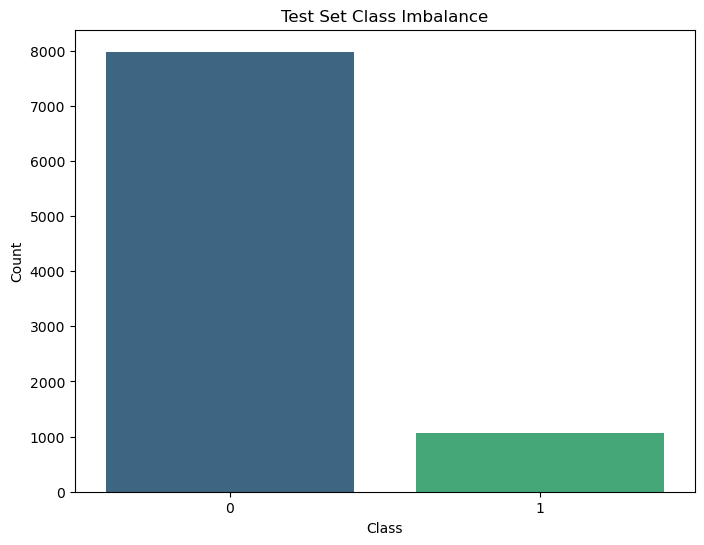

In [7]:
class_counts = pd.Series(y_test_encoded).value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')

plt.title('Test Set Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [8]:
# Applying Under Sampling TECHNIQUE

# Making an instance of OverSampler Class  
under_sampler = RandomUnderSampler(random_state=42) 
  
# Fit predictor (x variable) and target (y variable) using fit_resample() 
X_test, y_test = under_sampler.fit_resample(X_test_encoded, y_test_encoded) 
  
# Printing number of samples 
# in each class after Over-Sampling 
print('After Over Sampling: ') 
print('Samples in class No ', (y_test == 0).sum()) 
print('Samples in class Yes ', (y_test == 1).sum())

After Over Sampling: 
Samples in class No  1063
Samples in class Yes  1063


# 5a. Feature Scalling (Standardization)

In [9]:
from sklearn.preprocessing import StandardScaler

# Fit scaler on training data
scaler = StandardScaler()
# Transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform testing data
X_test_scaled = scaler.transform(X_test)


# 5b. Dimensionality Reduction

Cumulative percentage of variance explained by each component:
Components 1 to 1: 7.58%
Components 1 to 2: 13.60%
Components 1 to 3: 18.83%
Components 1 to 4: 23.29%
Components 1 to 5: 27.45%
Components 1 to 6: 31.31%
Components 1 to 7: 34.69%
Components 1 to 8: 37.75%
Components 1 to 9: 40.63%
Components 1 to 10: 43.37%
Components 1 to 11: 45.93%
Components 1 to 12: 48.36%
Components 1 to 13: 50.75%
Components 1 to 14: 53.11%
Components 1 to 15: 55.41%
Components 1 to 16: 57.67%
Components 1 to 17: 59.88%
Components 1 to 18: 62.06%
Components 1 to 19: 64.21%
Components 1 to 20: 66.33%
Components 1 to 21: 68.38%
Components 1 to 22: 70.40%
Components 1 to 23: 72.41%
Components 1 to 24: 74.39%
Components 1 to 25: 76.34%
Components 1 to 26: 78.27%
Components 1 to 27: 80.16%
Components 1 to 28: 82.04%
Components 1 to 29: 83.86%
Components 1 to 30: 85.63%
Components 1 to 31: 87.34%
Components 1 to 32: 89.00%
Components 1 to 33: 90.58%


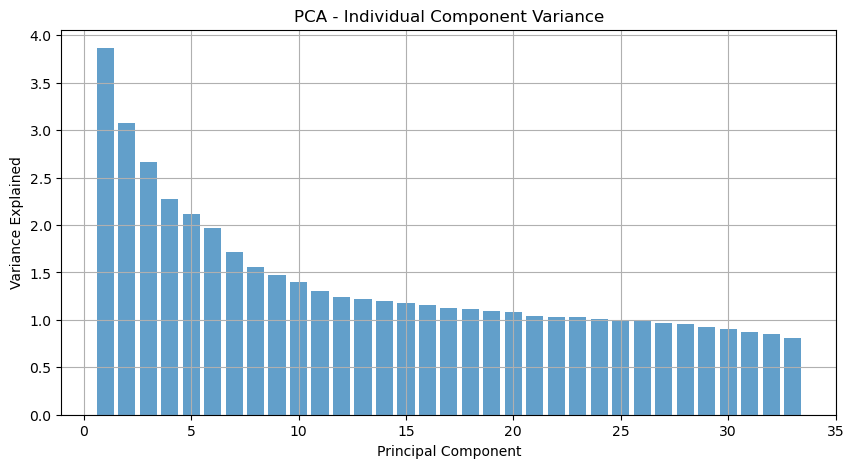

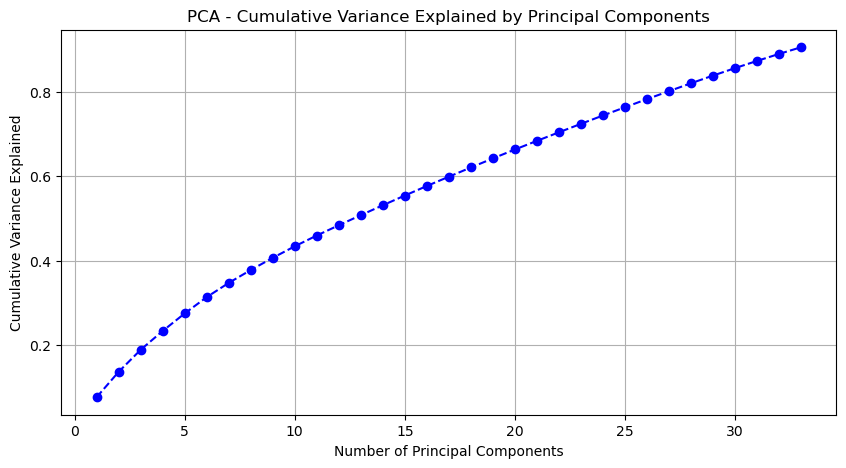

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=33)


X_train_pca = pca.fit_transform(X_train_scaled)

# Individual component variance
individual_variance = pca.explained_variance_

# Cumulative variance explained by each component
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

#Print cumulative percentage of variance explained by each component
print("Cumulative percentage of variance explained by each component:")
for i, cumulative_variance in enumerate(cumulative_variance_ratio):
    print(f"Components 1 to {i + 1}: {cumulative_variance * 100:.2f}%")

# Plot individual component variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(individual_variance) + 1), individual_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA - Individual Component Variance')
plt.grid(True)
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', 
         linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()

X_test_pca = pca.transform(X_test_scaled)

#------------------------------------

# 6. Machine Learning Algorithm

### 6.1 K-Nearest Neigbhor

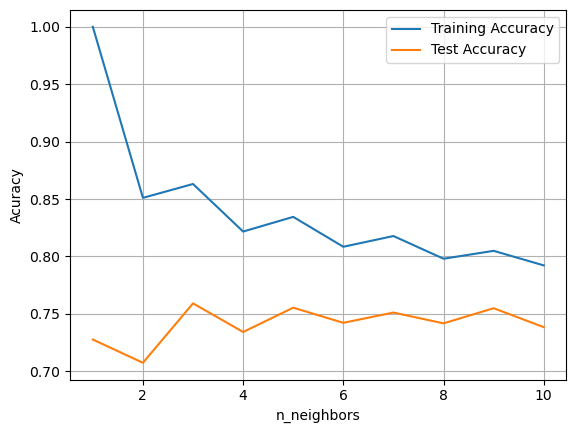

In [11]:
from sklearn.neighbors import KNeighborsClassifier
   
training_accuracy = []
test_accuracy = []
# try n_neigbhors from 1 to 10

neighbors_settings = range(1,11)
for n in neighbors_settings:
    
    #building the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_pca, y_train)
    
    #record the training set accuracy
    training_accuracy.append(knn.score(X_train_pca, y_train))
    
    #record the generalisation accuracy
    test_accuracy.append(knn.score(X_test_pca, y_test))
    
    predicted = knn.predict(X_test_pca)
    # Calculate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Neighbors')
#     plt.show()
#     print('=================================================')

plt.plot(neighbors_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_neighbors')
plt.grid()
plt.legend()
    

### 6.2 Decision Tree

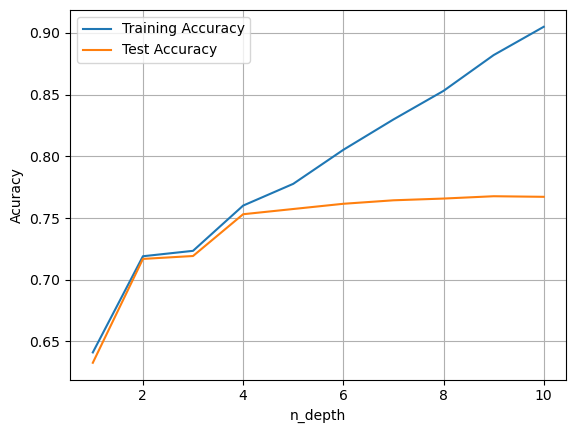

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 10

depth_settings = range(1,11)
for n in depth_settings:
    #building the model
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    tree.fit(X_train_pca, y_train)
    #record the training set accuracy
    training_accuracy.append(tree.score(X_train_pca, y_train))
    #record the generalisation accuracy
    test_accuracy.append(tree.score(X_test_pca, y_test))
    
    predicted = tree.predict(X_test_pca)
    # Calculate the confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Depth')
#     plt.show()
#     print('=================================================')

plt.plot(depth_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(depth_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_depth')
plt.grid()
plt.legend()


### 6.3 Random Forest

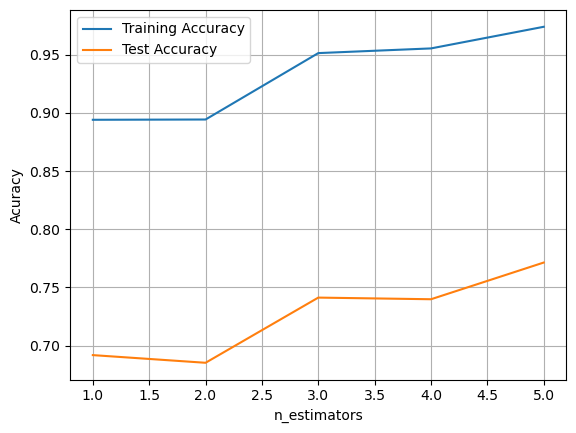

In [13]:
#Random Forest for SMOTE

from sklearn.ensemble import RandomForestClassifier
  
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

estimators_settings = range(1,6)
for n in estimators_settings:
    #building the model
    forest = RandomForestClassifier(n_estimators=n, max_features='sqrt', random_state=3)
    forest.fit(X_train_pca, y_train)
    #record the training set accuracy
    training_accuracy.append(forest.score(X_train_pca, y_train))
    #record the generalisation accuracy
    test_accuracy.append(forest.score(X_test_pca, y_test))
    
#     predicted = forest.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

    # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Estimators')
#     plt.show()
#     print('=================================================')

plt.plot(estimators_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(estimators_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_estimators')
plt.grid()
plt.legend()

### 6.4 Gradient Boosting

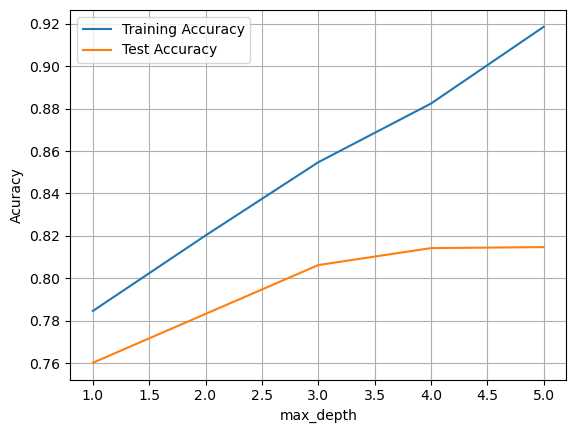

In [14]:
#Random Forest for SMOTE

from sklearn.ensemble import GradientBoostingClassifier
  
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 5

parameters_settings = range(1,6)
for n in estimators_settings:
    #building the model
    gbrt = GradientBoostingClassifier(max_depth=n, random_state=2)
    gbrt.fit(X_train_pca, y_train)
    #record the training set accuracy
    training_accuracy.append(gbrt.score(X_train_pca, y_train))
    #record the generalisation accuracy
    test_accuracy.append(gbrt.score(X_test_pca, y_test))
    
#     predicted = gbrt.predict(X_test_pca)
#     # Calculate the confusion matrix
#     confusion_matrix = metrics.confusion_matrix(y_test, predicted)

#     # Plot the confusion matrix
#     plt.figure(figsize=(0.5, 0.5))  
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
#     cm_display.plot()
#     plt.title(f'Confusion Matrix for {n} Max_depth')
#     plt.show()
#     print('=================================================')

plt.plot(parameters_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(parameters_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('max_depth')
plt.grid()
plt.legend()


### 6.5 Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.001)
logreg.fit(X_train_pca, y_train)
#record the training set accuracy
training_accuracy = logreg.score(X_train_pca, y_train)
#record the generalisation accuracy
test_accuracy = logreg.score(X_test_pca, y_test)
    
# predicted = logreg.predict(X_test_pca)
# # Calculate the confusion matrix
# confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# # Plot the confusion matrix
# plt.figure(figsize=(0.5, 0.5))  
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
# cm_display.plot()
# plt.title('Linear Regression with C=0.001')
# plt.show()
# print('=================================================')

print(training_accuracy)
print(test_accuracy)

0.8000473260766683
0.7803386641580433


# METRICS

METRICS FOR KNN
Cross Validation 5 Fold:
Accuracy: 0.7130781552057442
Variation +/-: 0.011570321787264755

Metrics:
Accuracy: 0.7554092191909689
Precision: 0.7767584097859327
Specificity: 0.7939793038570084
Sensitivity/Recall: 0.7168391345249294
F1 Measure: 0.7455968688845402
G Measure: 0.7455968688845402
Mathews Corr Coef: 0.5123450947300136
Time taken: 0.561173677444458


<Figure size 50x50 with 0 Axes>

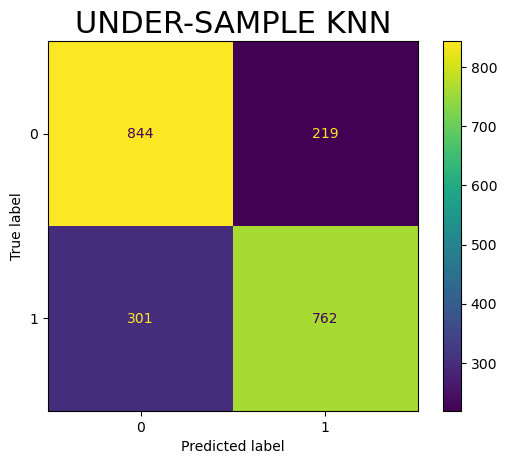

METRICS FOR DECISION TREE
Cross Validation 5 Fold:
Accuracy: 0.7177729908864954
Variation +/-: 0.029033207243639624

Metrics:
Accuracy: 0.764346190028222
Precision: 0.7587476979742173
Specificity: 0.753527751646284
Sensitivity/Recall: 0.7751646284101599
F1 Measure: 0.766868310842252
G Measure: 0.766868310842252
Mathews Corr Coef: 0.5288161783672131
Time taken: 0.15374422073364258


<Figure size 50x50 with 0 Axes>

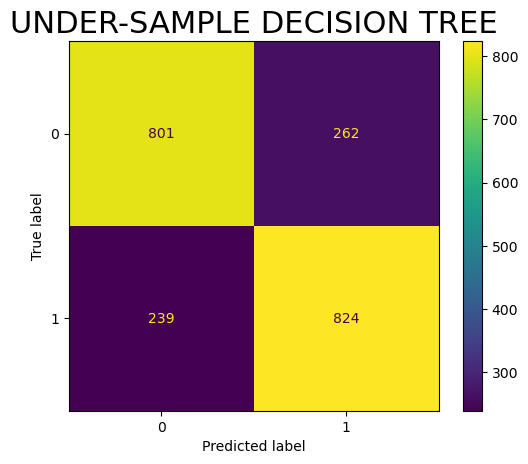

METRICS FOR RANDOM FOREST
Cross Validation 5 Fold:
Accuracy: 0.7267174813587406
Variation +/-: 0.005408787779674286

Metrics:
Accuracy: 0.7714016933207902
Precision: 0.7698783910196445
Specificity: 0.768579492003763
Sensitivity/Recall: 0.7742238946378175
F1 Measure: 0.7720450281425891
G Measure: 0.7720450281425891
Mathews Corr Coef: 0.5428120335110305
Time taken: 0.2257981300354004


<Figure size 50x50 with 0 Axes>

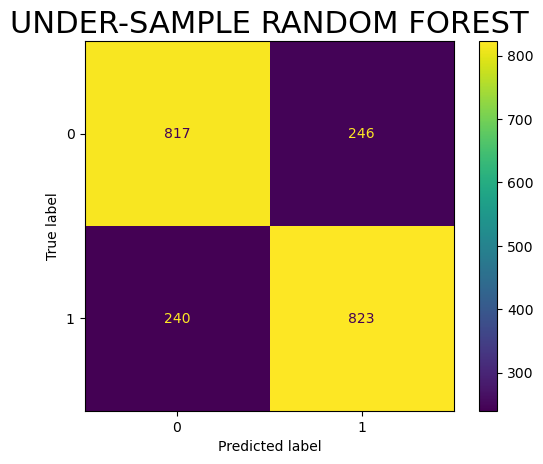

METRICS FOR GRADIENT BOOSTING
Cross Validation 5 Fold:
Accuracy: 0.7873847003590168
Variation +/-: 0.010958920170177293

Metrics:
Accuracy: 0.8142050799623707
Precision: 0.8047445255474452
Specificity: 0.7986829727187206
Sensitivity/Recall: 0.8297271872060207
F1 Measure: 0.8170449282075034
G Measure: 0.8170449282075034
Mathews Corr Coef: 0.6287131920020949
Time taken: 16.104969263076782


<Figure size 50x50 with 0 Axes>

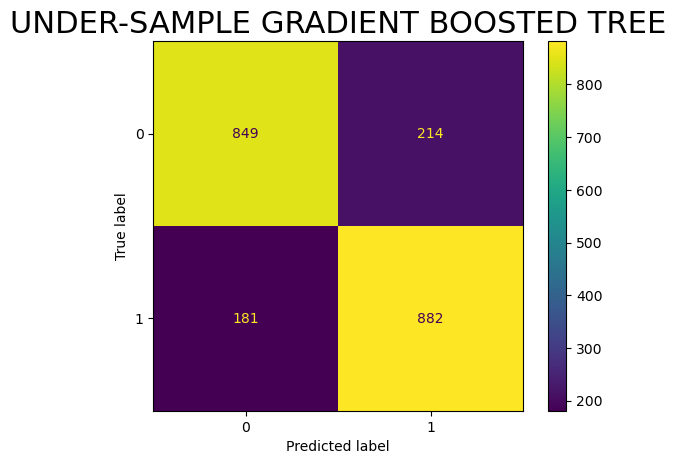

METRICS FOR LOGISTIC REGRESSION
Cross Validation 5 Fold:
Accuracy: 0.7516498204915768
Variation +/-: 0.007098903379722583

Metrics:
Accuracy: 0.7803386641580433
Precision: 0.7821969696969697
Specificity: 0.7836312323612418
Sensitivity/Recall: 0.7770460959548448
F1 Measure: 0.779613025011798
G Measure: 0.779613025011798
Mathews Corr Coef: 0.5606894853233277
Time taken: 0.02212357521057129


<Figure size 400x300 with 0 Axes>

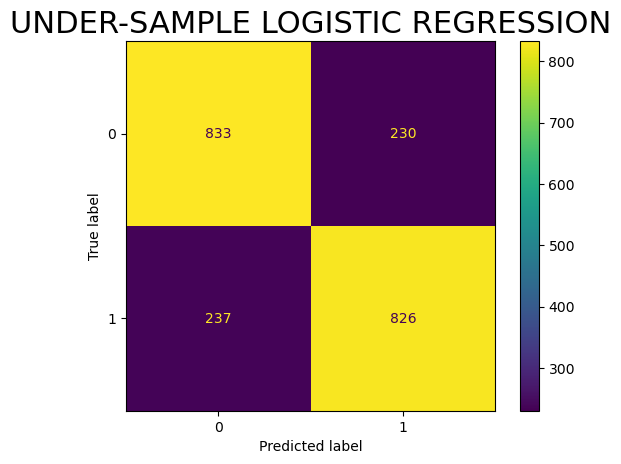

In [18]:
# METRICS

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import time

# Function to compute metrics
def compute_metrics(model, X, y):
    # Cross-validation 5 folds
    start_time = time.time()
    cv_scores = cross_val_score(model, X, y, cv=5)
    end_time = time.time()
    time_taken = end_time - start_time
    
    # Accuracy and Variation
    accuracy = cv_scores.mean()
    variation = cv_scores.std()
    
    # Metrics
    y_pred = model.predict(X)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    specificity = (y_pred[y == 0] == 0).sum() / (y == 0).sum()
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    mcc = matthews_corrcoef(y, y_pred)
    
    # Print results
    print("Cross Validation 5 Fold:")
    print("Accuracy:", accuracy)
    print("Variation +/-:", variation)
    print("\nMetrics:")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision)
    print("Specificity:", specificity)
    print("Sensitivity/Recall:", recall)
    print("F1 Measure:", f1)
    print("G Measure:", 2 * (precision * recall) / (precision + recall))
    print("Mathews Corr Coef:", mcc)
    print("Time taken:", time_taken)

print('METRICS FOR KNN')
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_pca, y_train)
compute_metrics(knn, X_test_pca, y_test)

predicted = knn.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE KNN', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR DECISION TREE')
tree = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train_pca, y_train)
compute_metrics(tree, X_test_pca, y_test)

predicted = tree.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE DECISION TREE', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR RANDOM FOREST')
forest = RandomForestClassifier(n_estimators=5, max_features='sqrt', random_state=3).fit(X_train_pca, y_train)
compute_metrics(forest, X_test_pca, y_test)

predicted = forest.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE RANDOM FOREST', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR GRADIENT BOOSTING')
gbrt = GradientBoostingClassifier(max_depth=4, random_state=2).fit(X_train_pca, y_train)
compute_metrics(gbrt, X_test_pca, y_test)

predicted = gbrt.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(0.5, 0.5))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE GRADIENT BOOSTED TREE', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')

print('METRICS FOR LOGISTIC REGRESSION')
logreg = LogisticRegression(C=0.001).fit(X_train_pca, y_train)
compute_metrics(logreg, X_test_pca, y_test)

predicted = logreg.predict(X_test_pca)
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
cm_display.plot()
plt.title('UNDER-SAMPLE LOGISTIC REGRESSION', fontsize=22)
plt.show()

print('=============================================')
print('=============================================')


# ROC CURVES FOR ALL ALGORITHMS

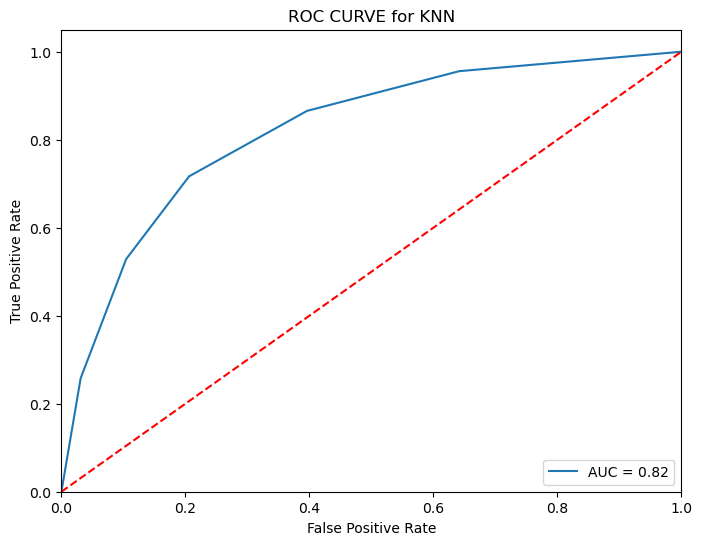

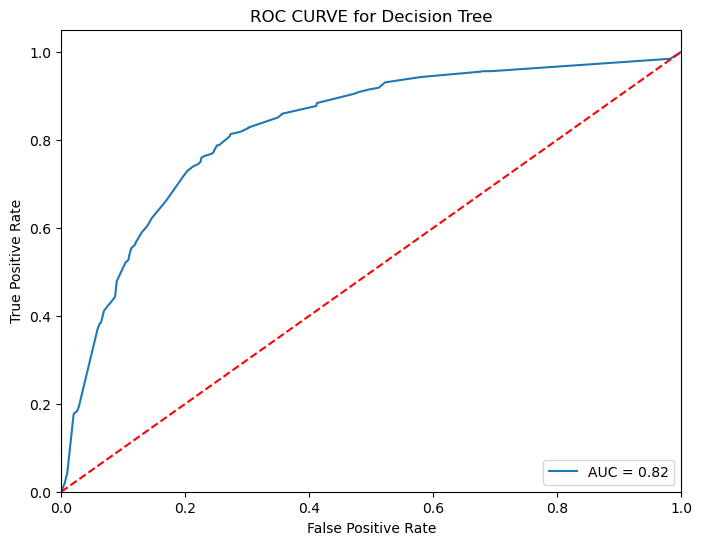

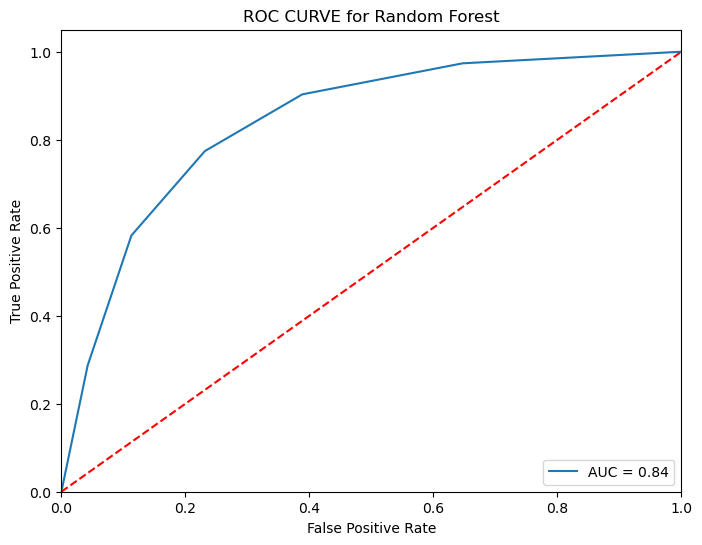

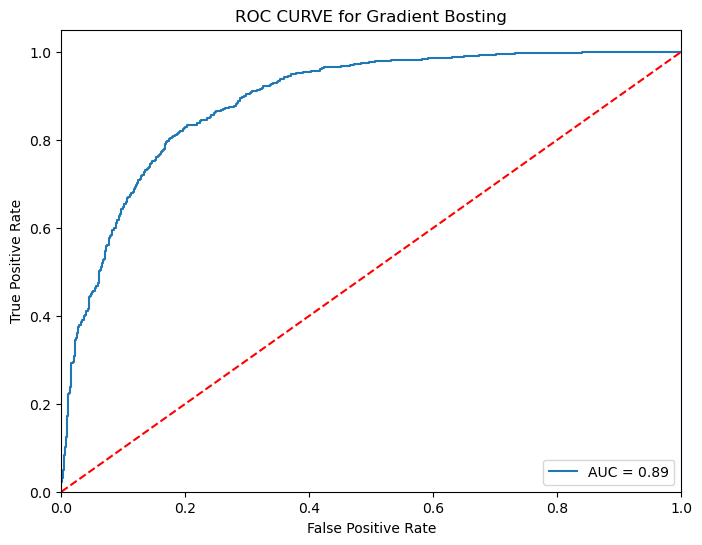

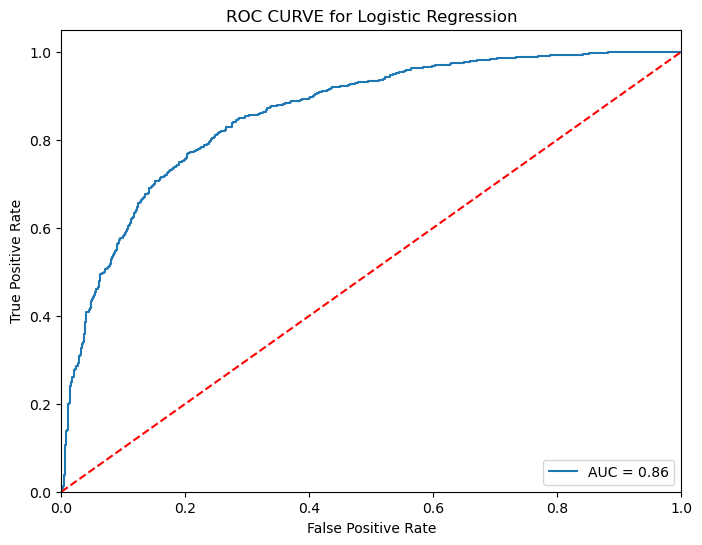

In [19]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test sets
def roc_plot(model, name):
    probs = model.predict_proba(X_test_pca)[:, 1]

    # Calculate ROC curve and AUC for each model
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)


    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)

    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC CURVE for {name}')
    plt.legend(loc='lower right')
    plt.show()


roc_plot(knn, 'KNN')
roc_plot(tree, 'Decision Tree')
roc_plot(forest, 'Random Forest')
roc_plot(gbrt, 'Gradient Bosting')
roc_plot(logreg, 'Logistic Regression')

